In [1]:
import pandas as pd 
import numpy as np 
from IPython.display import display
data = pd.read_excel('regression.xlsx')
# data.fillna(method='backfill',inplace=True)
data

,Country,Year,Total Energy,Fertilizer,Consumption in Agriculture,Government_Management,Law&Political Stability,Unemployment_rate,Yield(hg/ha),Gini_Index,CPI,Male/Female,Rural/Urban
0,Afghanistan,2000,74174.8829,0.64,432.0000,-1.350000,-2.630000,11.517000,57031.55319,29.000000,3.951382e+01,1.059369,3.529414
1,Albania,2000,77392.1087,26.75,33540.0000,-0.560000,-1.030000,16.573000,93010.24194,31.740000,6.660077e+01,1.024432,1.395734
2,Algeria,2000,74132.7500,11.27,0.0000,-1.060000,-0.920000,29.770000,55748.24286,27.620000,5.542482e+01,1.027428,0.668931
3,Angola,2000,74182.8939,0.42,516.0000,-1.520000,-1.180000,3.837000,45371.66667,51.960000,1.812510e+00,0.989632,0.996512
4,Antigua and Barbuda,2000,100294.5043,0.00,282880.2545,1.270000,-2.050000,8.394268,50049.87097,39.583658,7.349858e+01,0.886170,2.112650
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,Venezuela (Bolivarian Republic of),2019,81002.4751,139.67,70692.0000,-0.068282,0.245215,6.896713,127383.85510,37.791460,2.633984e+08,0.970604,0.133276
3756,Viet Nam,2019,89276.2317,251.76,155832.0000,-0.068282,0.245215,6.896713,101925.65380,37.791460,1.131217e+02,0.996700,1.730120
3757,Yemen,2019,76138.5091,3.03,20640.0000,-0.068282,0.245215,6.896713,63858.63077,36.710000,1.844438e+02,1.015387,1.682885
3758,Zambia,2019,75235.9175,52.02,11352.0000,-0.700000,0.490000,11.425000,98222.17949,57.140000,1.476608e+02,0.980638,1.269019


In [3]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
X = data.drop(['Country','Year'],axis=1)

In [8]:
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
X = t.fit_transform(X)
# X_train = t.transform(X_train)
# X_test = t.transform(X_test)
# define encoder
visible = Input(shape=(n_inputs,))
e = Dense(8)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)
# define bottleneck
n_bottleneck = 3
bottleneck = Dense(n_bottleneck)(e)
# define decoder
d = Dense(8)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
# plot_model(model, 'autoencoder.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X, X, epochs=200, batch_size=16, verbose=2)


Epoch 1/200
235/235 - 1s - loss: 0.2099
Epoch 2/200
235/235 - 0s - loss: 0.0387
Epoch 3/200
235/235 - 0s - loss: 0.0211
Epoch 4/200
235/235 - 0s - loss: 0.0159
Epoch 5/200
235/235 - 0s - loss: 0.0134
Epoch 6/200
235/235 - 0s - loss: 0.0120
Epoch 7/200
235/235 - 0s - loss: 0.0113
Epoch 8/200
235/235 - 0s - loss: 0.0105
Epoch 9/200
235/235 - 0s - loss: 0.0102
Epoch 10/200
235/235 - 0s - loss: 0.0099
Epoch 11/200
235/235 - 0s - loss: 0.0096
Epoch 12/200
235/235 - 0s - loss: 0.0093
Epoch 13/200
235/235 - 0s - loss: 0.0091
Epoch 14/200
235/235 - 0s - loss: 0.0088
Epoch 15/200
235/235 - 0s - loss: 0.0087
Epoch 16/200
235/235 - 0s - loss: 0.0085
Epoch 17/200
235/235 - 0s - loss: 0.0080
Epoch 18/200
235/235 - 0s - loss: 0.0079
Epoch 19/200
235/235 - 0s - loss: 0.0077
Epoch 20/200
235/235 - 0s - loss: 0.0074
Epoch 21/200
235/235 - 0s - loss: 0.0073
Epoch 22/200
235/235 - 0s - loss: 0.0072
Epoch 23/200
235/235 - 0s - loss: 0.0072
Epoch 24/200
235/235 - 0s - loss: 0.0070
Epoch 25/200
235/235 - 0s

Epoch 199/200
235/235 - 0s - loss: 0.0049
Epoch 200/200
235/235 - 0s - loss: 0.0050


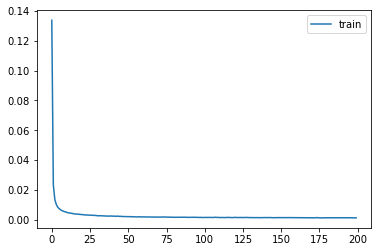

In [5]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense (Dense)                (None, 22)                264       
_________________________________________________________________
batch_normalization (BatchNo (None, 22)                88        
_________________________________________________________________
re_lu (ReLU)                 (None, 22)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                253       
_________________________________________________________________
dense_2 (Dense)              (None, 22)                264       
_________________________________________________________________
batch_normalization_1 (Batch (None, 22)                88    